In [1]:
import warnings
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.set_option('display.max_columns', None)

In [3]:
mid_df = pd.read_pickle('Pickles/mid_df.pkl')

In [4]:
mid_df.head()

,dispute_id,c_code_1,state_name_abb_a,c_code_2,state_name_abb_b,year,outcome,settlement_type,total_fatality_bin,num_with,...,war,year_num,cumulative_duration,ongoing_2010,date_start,date_end,initiator,trade_yrs_before_mid,state_name_1,state_name_2
0,3239,230,SPN,2,USA,1816,Victory for State B,None Value,None Value,1,...,0,1,1,0,1816-07-27,1816-07-27,0.0,NaN,Spain,United States of America
1,3239,2,USA,230,SPN,1816,Victory for State A,None Value,None Value,1,...,0,1,1,0,1816-07-27,1816-07-27,1.0,NaN,United States of America,Spain
2,3321,365,RUS,640,TUR,1817,Yield by State B,Negotiated,None Value,1,...,0,1,51,0,1817-09-12,1817-11-01,1.0,NaN,Russia,Turkey
3,3321,640,TUR,365,RUS,1817,Yield by for State A,Negotiated,None Value,1,...,0,1,51,0,1817-09-12,1817-11-01,0.0,NaN,Turkey,Russia
4,1567,230,SPN,2,USA,1818,Victory for State B,Negotiated,None,1,...,0,1,77,0,1818-03-15,1818-05-30,0.0,NaN,Spain,United States of America


In [5]:
aggregations = {
    'dispute_id': 'count',
    }

year_df = mid_df.groupby(['year']).agg(aggregations).reset_index()
year_df.rename({'dispute_id': 'num_conflicts'}, axis = 1, inplace = True)

In [6]:
year_df.head()

,year,num_conflicts
0,1816,2
1,1817,2
2,1818,2
3,1821,8
4,1822,4


In [7]:
year_df[(year_df['year'] < 1945) & (year_df['year'] >= 1900)]['num_conflicts'].mean()

51.46666666666667

In [8]:
for i, year in enumerate(year_df['year'][1:]):
    i+=1
    if year - year_df['year'][i - 1] == 1:
        pass
    else:
        print(year)

1821
1825


In [9]:
# fixing missing/incorrect values
year_df.loc[192, 'year'] = 1819
year_df.loc[192, 'num_conflicts'] = 0
year_df.loc[193, 'year'] = 1820
year_df.loc[193, 'num_conflicts'] = 0
year_df.loc[194, 'year'] = 1824
year_df.loc[194, 'num_conflicts'] = 0

year_df = year_df.sort_values(by = 'year', ascending = True)

print(year_df['year'].min())
print(year_df['year'].max())

1816.0
2010.0


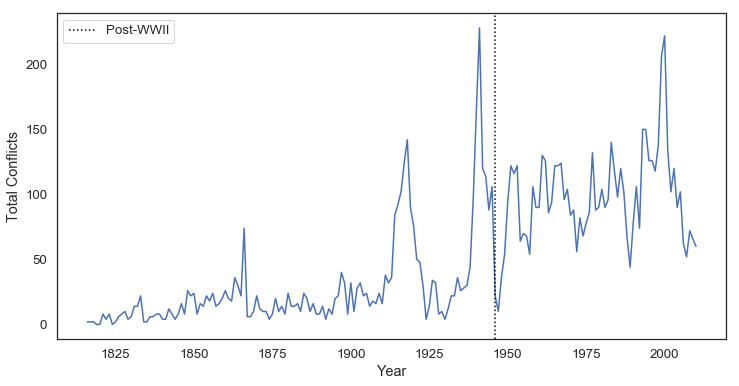

In [10]:
sns.set(style = 'white', font_scale = 1.2)
plt.figure(figsize = (12, 6))

plt.plot(year_df['year'], year_df['num_conflicts'], label = '')
plt.axvline(x = 1946, label = 'Post-WWII', c = 'black', linestyle = ':')
plt.xlabel('Year')
plt.ylabel('Total Conflicts')
plt.legend()
plt.savefig('Other/Images/total_conflicts_by_year.png');

In [11]:
mid_net_df = pd.read_pickle('Pickles/mid_net_df.pkl')

In [12]:
mid_net_df.head()

,dispute_id,c_code_1,state_name_abb_a,c_code_2,state_name_abb_b,year,outcome,settlement_type,total_fatality_bin,num_with,...,war,year_num,cumulative_duration,ongoing_2010,date_start,date_end,initiator,trade_yrs_before_mid,state_name_1,state_name_2
3544,1792,220,FRN,800,THI,1946,Stalemate,Negotiated,101-250,1,...,0,1,251,0,1946-04-01,1946-12-07,1.0,1.0,France,Thailand
3545,1792,800,THI,220,FRN,1946,Stalemate,Negotiated,101-250,1,...,0,1,251,0,1946-04-01,1946-12-07,0.0,1.0,Thailand,France
3546,2704,710,CHN,365,RUS,1946,Unclear,Unclear,None Value,1,...,0,2,211,0,1945-10-06,1946-05-03,0.0,74.0,China,Russia
3547,3192,200,UKG,345,YUG,1946,Stalemate,None Value,None Value,1,...,0,1,1,0,1946-10-05,1946-10-05,1.0,1.0,United Kingdom,Yugoslavia
3548,3192,345,YUG,200,UKG,1946,Stalemate,None Value,None Value,1,...,0,1,1,0,1946-10-05,1946-10-05,0.0,1.0,Yugoslavia,United Kingdom


In [13]:
usa_conflict_year = mid_net_df[mid_net_df['c_code_1'] == 2]['year'].unique().tolist()

print(str(usa_conflict_year[1:]))

[1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]


In [14]:
aggregations = {
    'dispute_id': 'count',
    }

country_df = mid_net_df.groupby(['c_code_1', 'state_name_1']).agg(aggregations).reset_index()
country_df.rename({'dispute_id': 'num_conflicts'}, axis = 1, inplace = True)
country_df = country_df.sort_values(by = 'num_conflicts', ascending = False)

In [15]:
country_df.loc[country_df['state_name_1'] == 'United States of America', 'state_name_1'] = 'USA'

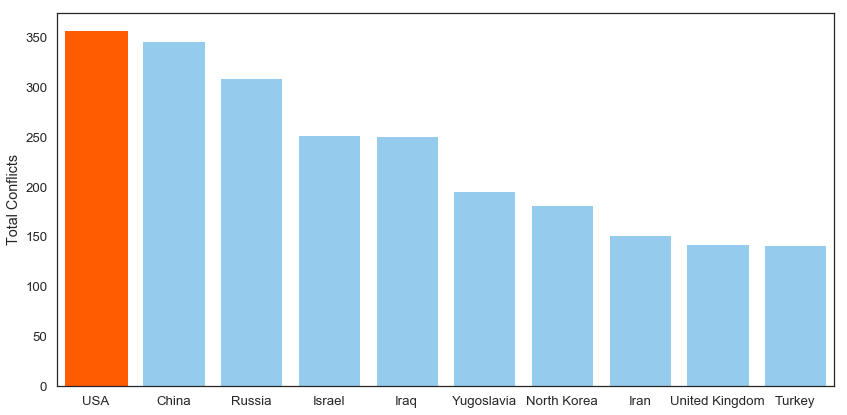

In [16]:
sns.set(style = 'white', font_scale = 1.2)
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = 'state_name_1',  y = 'num_conflicts', 
                 data = country_df[:10], color = 'lightskyblue')
# ax.set_title('Number of Conflicts Since WWII\nTop 10 Countries')
ax.set_xlabel('')
ax.set_ylabel('Total Conflicts')
ax.set_xticklabels(country_df['state_name_1'][:10])
ax.get_children()[0].set_color('#ff5b00')
plt.tight_layout()
plt.savefig('Other/Images/conflicts_since_wwii.png')

In [17]:
# numbers acquired manually from another notebook
simul_trade_mid = 3125
total_trades = 703116
total_conflicts = 3154

count_df = pd.DataFrame([(3125/703116), (3125/3154)], ['Trade without Conflict', 'Conflict with Trade']).reset_index()

In [18]:
count_df.rename({'index': 'variable', 0: 'count'}, axis = 1, inplace = True)

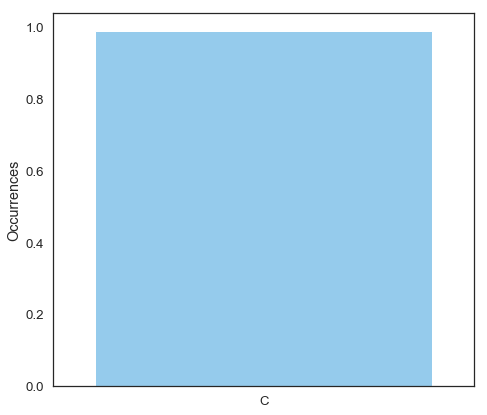

In [19]:
sns.set(style = 'white', font_scale = 1.2)
plt.figure(figsize = (7, 6))
ax = sns.barplot(x = 'variable',  y = 'count', 
                 data = count_df[1:], color = 'lightskyblue')
# ax.set_title('Number of Conflicts Since WWII\nTop 10 Countries')
ax.set_xlabel('')
ax.set_ylabel('Occurrences')
ax.set_xticklabels(count_df['variable'][1])
plt.tight_layout()
plt.savefig('Other/Images/simul_trade_mid.png')

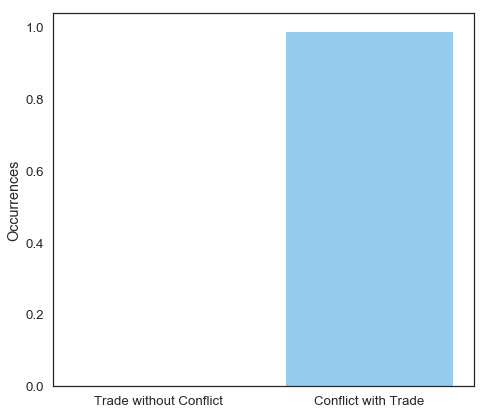

In [20]:
sns.set(style = 'white', font_scale = 1.2)
plt.figure(figsize = (7, 6))
ax = sns.barplot(x = 'variable',  y = 'count', 
                 data = count_df, color = 'lightskyblue')
# ax.set_title('Number of Conflicts Since WWII\nTop 10 Countries')
ax.set_xlabel('')
ax.set_ylabel('Occurrences')
ax.set_xticklabels(count_df['variable'])
plt.tight_layout()
plt.savefig('Other/Images/simul_trade_mid.png')

In [21]:
df = pd.read_pickle('Pickles/df_modeling.pkl')

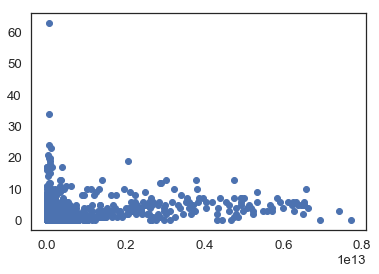

In [22]:
plt.scatter(df['prim_energy_consumption'], df['num_conflicts'])

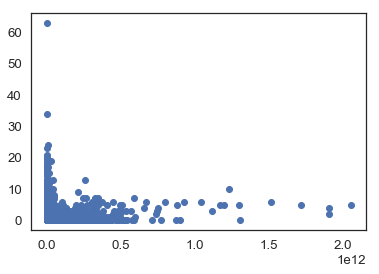

In [23]:
plt.scatter(df['export_dollars'], df['num_conflicts'])

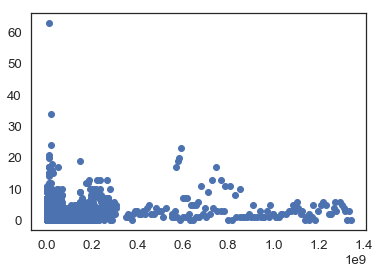

In [24]:
plt.scatter(df['total_pop'], df['num_conflicts'])